Atalov S.

# Credit Card Fraud Detection
---

<img src="https://www.usatoday.com/money/blueprint/images/uploads/2023/09/20041937/GettyImages-1271123246-e1695198030910.jpg?width=700&fit=cover&format=webp" width=300>

- Trans_date_trans_time: Timestamp of the transaction (date and time).
- Cc_num:Unique customer identification number.
- MerchantThe merchant involved in the transaction.
- Category Transaction type (e.g., personal, childcare).
- Amt:Transaction amount.
- First: Cardholder's first name.
- Last Cardholder's last name.
- Gender: Cardholder's gender.
- Street: Cardholder's street address.
- City: Cardholder's city of residence.
- State: Cardholder's state of residence.
- Zip: Cardholder's zip code.
- Lat:Latitude of cardholder's location.
- Long: Longitude of cardholder's location.
- City_pop:Population of the cardholder's city.
- Job:Cardholder's job title.
- Dob: Cardholder's date of birth.
- Trans_num: Unique transaction identifier.
- Unix_time: Transaction timestamp (Unix format).
- Merch_lat:Merchant's location (latitude).
- Merch_long: Merchant's location (longitude).
- Is_fraud:Fraudulent transaction indicator (1 = fraud, 0 = legitimate). This is the target variable for classification purposes.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('fraud_train.csv')

In [4]:
df.drop(columns=['first', 'last','merchant','street', 'trans_date_trans_time', 'cc_num', 'unix_time', 'trans_num','zip','dob','city','job'],inplace=True)

In [5]:
df['is_fraud'].value_counts()

is_fraud
0    387502
1      1501
Name: count, dtype: int64

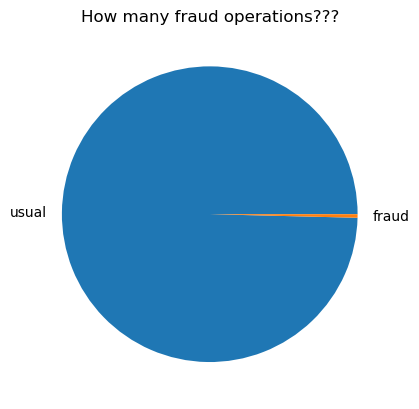

In [6]:
plt.pie(df['is_fraud'].value_counts(), labels=['usual', 'fraud']);
plt.title('How many fraud operations???');

In [7]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [8]:
num = ['amt', 'merch_lat', 'city_pop', 'merch_long','long','lat']
cot = ['category', 'state', 'gender']

In [9]:
df

,category,amt,gender,state,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,misc_pos,75.51,F,NJ,40.6152,-74.4150,71485,41.213751,-74.446915,0
1,personal_care,2.04,M,IA,42.4657,-93.8262,9165,42.502710,-93.779786,0
2,food_dining,62.19,M,LA,29.9912,-90.2479,68211,30.711473,-91.037796,0
3,shopping_net,9.05,M,WI,43.9446,-88.0911,5196,43.311992,-87.459984,0
4,misc_pos,306.65,F,AR,34.4596,-93.6743,1383,34.380378,-93.373485,0
...,...,...,...,...,...,...,...,...,...,...
388998,grocery_pos,211.31,F,TX,29.7972,-95.3288,2906700,30.646939,-94.379671,0
388999,food_dining,69.09,M,KS,37.6395,-97.1714,409656,38.522078,-98.166023,0
389000,shopping_net,8.27,F,OH,40.2158,-83.9579,133,40.314221,-83.608563,0
389001,home,67.23,F,SC,33.3645,-81.2718,4913,33.860599,-82.022124,0


In [10]:
df

,category,amt,gender,state,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,misc_pos,75.51,F,NJ,40.6152,-74.4150,71485,41.213751,-74.446915,0
1,personal_care,2.04,M,IA,42.4657,-93.8262,9165,42.502710,-93.779786,0
2,food_dining,62.19,M,LA,29.9912,-90.2479,68211,30.711473,-91.037796,0
3,shopping_net,9.05,M,WI,43.9446,-88.0911,5196,43.311992,-87.459984,0
4,misc_pos,306.65,F,AR,34.4596,-93.6743,1383,34.380378,-93.373485,0
...,...,...,...,...,...,...,...,...,...,...
388998,grocery_pos,211.31,F,TX,29.7972,-95.3288,2906700,30.646939,-94.379671,0
388999,food_dining,69.09,M,KS,37.6395,-97.1714,409656,38.522078,-98.166023,0
389000,shopping_net,8.27,F,OH,40.2158,-83.9579,133,40.314221,-83.608563,0
389001,home,67.23,F,SC,33.3645,-81.2718,4913,33.860599,-82.022124,0


Is it ok to use accuracy???

## Metrics: Precision vs Recall

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width=300>

### Which one to use? Precision or Recall?

$\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}$


$\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
$

In [11]:
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Определяем индексы числовых и категориальных признаков
numeric_features = ['amt', 'merch_lat', 'city_pop', 'merch_long', 'long', 'lat']
categorical_features = ['category', 'state', 'gender']

# Создаем преобразователи для числовых и категориальных признаков
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Преобразование с использованием стандартного масштабирования
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Преобразование с использованием кодирования One-Hot
])

# Собираем ColumnTransformer, который будет применять нужные преобразования к разным группам признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Пример создания весов для обучающих примеров
# В этом примере мы просто устанавливаем веса для положительного класса (1) в 10, а для отрицательного класса (0) в 1
y_train_weights = np.ones_like(y_train)
y_train_weights[y_train == 1] = 100

# Создаем пайплайн, который сначала преобразует данные, а затем обучает модель GradientBoostingClassifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', GradientBoostingClassifier(max_depth=7, min_samples_split=2, learning_rate=0.05, n_estimators=300))])


In [26]:
X = df.copy()
y=X.pop('is_fraud')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0, stratify=y)

In [28]:
pipeline.fit(X_train, y_train, classifier__sample_weight=y_train_weights)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['amt', 'merch_lat',
                                                   'city_pop', 'merch_long',
                                                   'long', 'lat']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['category', 'state',
                                                   'gender'])])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=7,
                                            n_estimators=300))])

In [29]:
pred = pipeline.predict(X_train)

In [30]:
pipeline.score(X_train,y_train)

0.9965585054080629

In [31]:
recall_score(y_train, pred)

1.0

In [32]:
test_predict = pipeline.predict(X_test)
recall_score(y_test,test_predict)

0.79

In [34]:
precision_score(y_test, test_predict)

0.4044368600682594

In [33]:
pipeline.score(X_test,y_test)

0.9947044382462951

### Using specific evaluation metric for GridSearch

```python
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',  # You can change this to 'roc_auc', 'precision', 'recall', etc. as per your requirement
    cv=5,  # Number of cross-validation folds
    verbose=1, # Print progress
    n_jobs=-1  # Use all available cores
)
```

[ALL METRICS INFO](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

In [25]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {
    'classifier__n_estimators': [50],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10]
}

In [43]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='recall',  # You can change this to 'roc_auc', 'precision', 'recall', etc. as per your requirement
    cv=5,  # Number of cross-validation folds
    verbose=1, # Print progress
    n_jobs=-1  # Use all available cores
)

In [44]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['amt',
                                                                          'merch_lat',
                                                                          'city_pop',
                                                                          'merch_long',
                                                                          'long',
                                                                          'lat']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['category',
                                                                          'state',
                                                                          'gender'])])),
                                       ('classifier',
                                        GradientBoostingClassifier(learning_rate=0.05,
                                                                   max_depth=5,
                                                                   n_estimators=300))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.05, 0.1],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50]},
             scoring='recall', verbose=1)

In [46]:
grid_search.best_params_

{'classifier__learning_rate': 0.05,
 'classifier__max_depth': 7,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 50}

In [47]:
grid_search.best_score_

0.5890756302521009

## TASK:

### 1. Build model to predict fraud operations (do not use score (accuracy) as a metric)
### 2. Make a predictions on test data and submit them as csv file

In [37]:
df2 = pd.read_csv("fraud_test.csv")

In [39]:
df2.drop(columns=['first', 'last','merchant','street', 'trans_date_trans_time', 'cc_num', 'unix_time', 'trans_num','zip','dob','city','job'],inplace=True)

In [43]:
preds = pd.DataFrame(pipeline.predict(df2))

In [46]:
preds.to_csv("credit_fraud_test")